## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("DigitalAd_dataset.csv")
data.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [3]:
x=pd.DataFrame(data.iloc[:,:-1])
y=pd.DataFrame(data.iloc[:,-1])

## Scalling

In [4]:
def up_scale(x):
    m,s,new_x=[],[],pd.DataFrame(columns=x.columns)
    for i in x:
        m.append(np.mean(x[i]))
        s.append(np.std(x[i]))
    for i,j,k in zip(m,s,x):
        new_x[k]=((x[k]-i)/j)
    return new_x,m,s

In [5]:
scaled_x,x_mean,x_std=up_scale(x)
print(scaled_x.head())
print(x_mean,x_std)

        Age    Salary
0 -1.877311  0.359940
1 -0.826666  0.301210
2  0.892570 -1.313857
3  0.701544 -1.284492
4  0.797057 -1.225763
[37.655, 69742.5] [10.469764801560734, 34054.3124104716]


In [6]:
def down_scale(x,m,s):
    new_x=pd.DataFrame(columns=x.columns)
    for i,j,k in zip(x,m,s):
        new_x[i]=(k*x[i]+j).astype(int)
    return new_x

In [7]:
down_x=down_scale(scaled_x,x_mean,x_std)
print(down_x.tail())
print(x.tail())

     Age  Salary
395   35   65000
396   26   80000
397   26   52000
398   20   86000
399   32   18000
     Age  Salary
395   35   65000
396   26   80000
397   26   52000
398   20   86000
399   32   18000


## Using library method

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,random_state=1,test_size=1/3)

model=LogisticRegression()
model.fit(x_train,np.array(y_train).ravel())

pre=model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pre,y_test)*100)

79.8507462686567


In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pre,np.array(y_test))
print(cm)

[[72 23]
 [ 4 35]]


In [22]:
def accuracy(y_pre,y_true):
    s=0.0
    for i,j in zip(y_pre,y_true):
        if(i==j):
            s+=1;
    s*=100.0
    return s/len(y_pre)

Loss : (-y * np.log(y_pre) - (1 - y) * np.log(1 - y_pre)).mean()

In [23]:
print(accuracy(np.array(pre),np.array(y_test).ravel()))

79.85074626865672


# Gradient Descent

## Formula<br>
<pre style="font-family:verdana;">To update the weight and bias values:
        w=w-L*dw
        b=b-L*db
        here w is weight 
                b is bias
                L is learning rate
                dw is change in the weight
                db is change in the bias
To find dw,db
       dw=sum((w*x+b-y)*w)/n
       db=sum(w*x+b-y)/n
</pre>

In [24]:
def difference(x,y,w,b):
    n=len(x)
    pre=prediction(x,w,b)
    dw=(1/n)*np.dot(np.sum(x,axis=1),(y-np.array(pre)))
    db=(1/n)*np.sum(y-pre)
    return np.array(dw).astype(float),np.array(db).astype(float)

In [25]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1.0/(1+np.exp(-z))

In [26]:
def prediction(x,w,b):
    pre=np.array(sigmoid(np.dot(x,w)+b))
    return np.where(pre>=0.5,1,0)

In [27]:
def gradient_descent(x,y,no_iteration,learning_rate):
    w=np.zeros((x.shape[1],1)).astype(float)
    b=np.array([0])
    for i in range(no_iteration):
        w_change,b_change=zip(difference(x,y,w,b) )
        w=w+learning_rate*np.array(w_change)
        b=b+learning_rate*np.array(b_change)
        if((i+1)%100==0):
            print(f"Iteration no.{i+1} and the accuracy is {accuracy(prediction(x,w,b),np.array(y))}")# w:{w} , b:{b}")  
    return w,b

In [28]:
new_w,new_b=gradient_descent(x_train,np.array(y_train),600,1e-2)

Iteration no.100 and the accuracy is 82.70676691729324
Iteration no.200 and the accuracy is 84.9624060150376
Iteration no.300 and the accuracy is 85.33834586466165
Iteration no.400 and the accuracy is 85.33834586466165
Iteration no.500 and the accuracy is 85.71428571428571
Iteration no.600 and the accuracy is 85.33834586466165


In [29]:
print(accuracy(prediction(x_test,new_w,new_b),np.array(y_test)))

78.35820895522389


### *CONFUSION MATRIX*
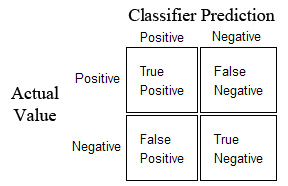

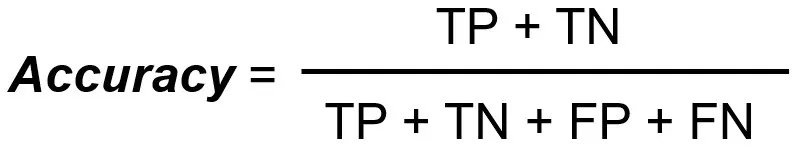

In [42]:
def confusion_matrix(pre,y):
    TP,FP,TN,FN=0,0,0,0
    for i,j in zip(pre,y):
        if(i==j):
            if (j==1):
                TP+=1
            else:
                TN+=1
        else:
            if(j==1):
                FP+=1
            else:
                FN+=1
    ans=np.array([[TN,FP],[FN,TP]])
    return ans

In [43]:
confusion_matrix(prediction(x_test,new_w,new_b),np.array(y_test))

array([[60, 10],
       [ 7, 23]])

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(prediction(x_test,new_w,new_b),np.array(y_test))
print(cm)

[[60 10]
 [ 7 23]]


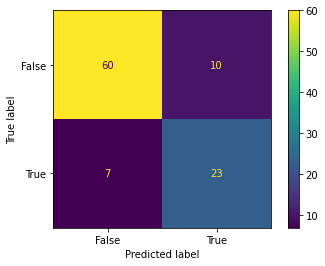

In [45]:
from sklearn import metrics
con_met=metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
con_met.plot()